# 1. Import modules and read in data

In [313]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

import calendar
import datetime

In [314]:
# list of .txt files to be read
txt_docs_list = ['turnstile_180310.txt', 'turnstile_180317.txt','turnstile_180324.txt', 
                 'turnstile_180331.txt', 'turnstile_180407.txt']

# reading in the files
df_list = []
for each in range(3,4):
    df_list.append(pd.read_csv(txt_docs_list[each]))
    
# concatenating the DFs together as 'df'
df = pd.concat(df_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196654 entries, 0 to 196653
Data columns (total 11 columns):
C/A                                                                     196654 non-null object
UNIT                                                                    196654 non-null object
SCP                                                                     196654 non-null object
STATION                                                                 196654 non-null object
LINENAME                                                                196654 non-null object
DIVISION                                                                196654 non-null object
DATE                                                                    196654 non-null object
TIME                                                                    196654 non-null object
DESC                                                                    196654 non-null object
ENTRIES                           

In [315]:
# strip columns, create turnstile_id, create 'date' and 'DATE_TIME' columns as datetime type, drop unnecessary columns
df.columns = df.columns.str.strip()
df['turnstile_id'] = df['C/A'] + '_' + df['UNIT'] + '_' + df['SCP'] + '_' + df['STATION']
df['date'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')
df['DATE_TIME'] = df['DATE'] + '_' + df['TIME']
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'],format="%m/%d/%Y_%H:%M:%S")
df.drop(['LINENAME', 'DIVISION'], axis=1, inplace=True)
df.sample(10)

,C/A,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile_id,date,DATE_TIME
54839,N087,R282,01-06-00,SPRING ST,03/25/2018,04:00:00,REGULAR,7217899,2632129,N087_R282_01-06-00_SPRING ST,2018-03-25,2018-03-25 04:00:00
36209,J002,R460,00-00-02,MARCY AV,03/30/2018,21:00:00,REGULAR,431621,326967,J002_R460_00-00-02_MARCY AV,2018-03-30,2018-03-30 21:00:00
52072,N072,R012,05-03-00,34 ST-PENN STA,03/24/2018,16:00:00,REGULAR,2696129,770115,N072_R012_05-03-00_34 ST-PENN STA,2018-03-24,2018-03-24 16:00:00
64168,N128,R200,00-00-01,EUCLID AV,03/26/2018,20:00:00,REGULAR,5102571,1235365,N128_R200_00-00-01_EUCLID AV,2018-03-26,2018-03-26 20:00:00
64709,N130,R383,01-06-00,80 ST,03/26/2018,01:00:00,REGULAR,4806424,1841404,N130_R383_01-06-00_80 ST,2018-03-26,2018-03-26 01:00:00
130812,R142,R293,01-06-00,34 ST-PENN STA,03/27/2018,02:00:00,REGULAR,100793606,773846,R142_R293_01-06-00_34 ST-PENN STA,2018-03-27,2018-03-27 02:00:00
2043,A014,R081,02-00-02,49 ST,03/28/2018,12:00:00,REGULAR,1248790,2425741,A014_R081_02-00-02_49 ST,2018-03-28,2018-03-28 12:00:00
153977,R243,R049,00-03-01,51 ST,03/25/2018,08:00:00,REGULAR,4738176,2108910,R243_R049_00-03-01_51 ST,2018-03-25,2018-03-25 08:00:00
118872,PTH18,R549,01-02-02,NEWARK BM BW,03/28/2018,14:27:52,REGULAR,30849,1713,PTH18_R549_01-02-02_NEWARK BM BW,2018-03-28,2018-03-28 14:27:52
124735,R113,R028,01-06-00,FULTON ST,03/27/2018,23:00:00,REGULAR,1113638,2990668,R113_R028_01-06-00_FULTON ST,2018-03-27,2018-03-27 23:00:00


# 2. Create and incorporate accurate counts of 'ENTRIES' and 'EXITS'

In [316]:
df_temp=df[['turnstile_id','date','DATE_TIME','ENTRIES','EXITS','STATION']]
# df.head()

In [317]:
df_temp1=(df_temp
 .sort_values(by=['turnstile_id','DATE_TIME'])
 .groupby(['turnstile_id','date','STATION'])
 .diff())
df_temp1.head()

,DATE_TIME,ENTRIES,EXITS
0,NaT,NaN,NaN
1,04:00:00,0.0,0.0
2,04:00:00,0.0,0.0
3,04:00:00,1.0,1.0
4,04:00:00,4.0,4.0


In [318]:
df_temp2=(df_temp
 .sort_values(by=['turnstile_id','DATE_TIME']))
df_temp2.head()

,turnstile_id,date,DATE_TIME,ENTRIES,EXITS,STATION
0,A002_R051_02-00-00_59 ST,2018-03-24,2018-03-24 00:00:00,6559322,2221550,59 ST
1,A002_R051_02-00-00_59 ST,2018-03-24,2018-03-24 04:00:00,6559322,2221550,59 ST
2,A002_R051_02-00-00_59 ST,2018-03-24,2018-03-24 08:00:00,6559322,2221550,59 ST
3,A002_R051_02-00-00_59 ST,2018-03-24,2018-03-24 12:00:00,6559323,2221551,59 ST
4,A002_R051_02-00-00_59 ST,2018-03-24,2018-03-24 16:00:00,6559327,2221555,59 ST


In [319]:
df_temp1['turnstile_id']=df_temp2['turnstile_id']
df_temp1['STATION']=df_temp2['STATION']
df_temp1['date']=df_temp2['date']
df_temp1.head()

,DATE_TIME,ENTRIES,EXITS,turnstile_id,STATION,date
0,NaT,NaN,NaN,A002_R051_02-00-00_59 ST,59 ST,2018-03-24
1,04:00:00,0.0,0.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-24
2,04:00:00,0.0,0.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-24
3,04:00:00,1.0,1.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-24
4,04:00:00,4.0,4.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-24


In [320]:
df_temp1.dropna(axis=0,inplace=True)

In [321]:
# confirm two datasets are aligned
print(df_temp1.turnstile_id[156050])
print(df_temp2.turnstile_id[156050])

R246_R177_00-03-04_68ST-HUNTER CO
R246_R177_00-03-04_68ST-HUNTER CO


# 3. Clean up ENTRIES/EXITS count data

In [322]:
df_final = pd.DataFrame()
df_final = df_temp1[['turnstile_id','STATION','date', 'ENTRIES', 'EXITS', 'DATE_TIME']]
df_final.head()

,turnstile_id,STATION,date,ENTRIES,EXITS,DATE_TIME
1,A002_R051_02-00-00_59 ST,59 ST,2018-03-24,0.0,0.0,04:00:00
2,A002_R051_02-00-00_59 ST,59 ST,2018-03-24,0.0,0.0,04:00:00
3,A002_R051_02-00-00_59 ST,59 ST,2018-03-24,1.0,1.0,04:00:00
4,A002_R051_02-00-00_59 ST,59 ST,2018-03-24,4.0,4.0,04:00:00
5,A002_R051_02-00-00_59 ST,59 ST,2018-03-24,14.0,3.0,04:00:00


In [323]:
# Below tells us the mean is negative, which is strange. 
# Given the min val, must be a handful of massively negative outliers
'''
print(df_final.ENTRIES.describe())
print(df_final.EXITS.describe())
'''
# Below is confirming this hypothesis and guaging the extent of the issue.
'''
neg_en_test = df_final[df_final.ENTRIES < 0]
neg_ex_test = df_final[df_final.EXITS < 0]
sum_en = neg_en_test.ENTRIES.sum()
sum_ex = neg_ex_test.EXITS.sum()
print('negative ENTRIES count: '+str(len(neg_en_test.ENTRIES)))
print('negative EXITS count: '+str(len(neg_ex_test.EXITS)))
print('negative ENTRIES SUM: ' + str(sum_en))
print('negative EXITS SUM: ' + str(sum_ex))
'''

"\nneg_en_test = df_final[df_final.ENTRIES < 0]\nneg_ex_test = df_final[df_final.EXITS < 0]\nsum_en = neg_en_test.ENTRIES.sum()\nsum_ex = neg_ex_test.EXITS.sum()\nprint('negative ENTRIES count: '+str(len(neg_en_test.ENTRIES)))\nprint('negative EXITS count: '+str(len(neg_ex_test.EXITS)))\nprint('negative ENTRIES SUM: ' + str(sum_en))\nprint('negative EXITS SUM: ' + str(sum_ex))\n"

In [324]:
# To correct for the negative counts defined above, take absolute values and then 
# drop top 1% of recordings to eliminate outliers.

# First build the lists...
nn_entries_list = [abs(x) for x in df_final.ENTRIES]
nn_exits_list = [abs(x) for x in df_final.EXITS]

# Then include the lists in df_final as columns...
df_final['nn_entries'] = nn_entries_list
df_final['nn_exits'] = nn_exits_list
# df_final.describe() # confirms cleaning has been performed

/Users/jas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/jas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [325]:
# Remove anything above 99% quantile.
en_q99 = df_final['nn_entries'].quantile(0.99)
ex_q99 = df_final['nn_exits'].quantile(0.99)

# Filter out upper outliers based on en_q99 and ex_q99 defined above.
df_final_c = df_final[(df_final['nn_entries'] < en_q99) & (df_final['nn_exits'] < ex_q99)].drop(['ENTRIES','EXITS'], axis=1)
df_final_c.rename(columns={'nn_entries': 'nn99_entries', 'nn_exits': 'nn99_exits'}, inplace=True)
df_final_c.head()

,turnstile_id,STATION,date,DATE_TIME,nn99_entries,nn99_exits
1,A002_R051_02-00-00_59 ST,59 ST,2018-03-24,04:00:00,0.0,0.0
2,A002_R051_02-00-00_59 ST,59 ST,2018-03-24,04:00:00,0.0,0.0
3,A002_R051_02-00-00_59 ST,59 ST,2018-03-24,04:00:00,1.0,1.0
4,A002_R051_02-00-00_59 ST,59 ST,2018-03-24,04:00:00,4.0,4.0
5,A002_R051_02-00-00_59 ST,59 ST,2018-03-24,04:00:00,14.0,3.0


In [326]:
# Create new dataframe, 'df_final_date', as starting point for graphing
df_final_date = df_final_c[['STATION', 'date', 'turnstile_id', 'nn99_entries', 'nn99_exits']]
df_final_date['day_of_week'] = df_final_date['date'].dt.weekday_name
df_final_date.head()

,STATION,date,turnstile_id,nn99_entries,nn99_exits,day_of_week
1,59 ST,2018-03-24,A002_R051_02-00-00_59 ST,0.0,0.0,Saturday
2,59 ST,2018-03-24,A002_R051_02-00-00_59 ST,0.0,0.0,Saturday
3,59 ST,2018-03-24,A002_R051_02-00-00_59 ST,1.0,1.0,Saturday
4,59 ST,2018-03-24,A002_R051_02-00-00_59 ST,4.0,4.0,Saturday
5,59 ST,2018-03-24,A002_R051_02-00-00_59 ST,14.0,3.0,Saturday


In [327]:
df_final_date=(df_final_date
 .groupby(['turnstile_id','date','STATION'])
 .sum())
print('Confirm its running and returning reasonable values: ' + str(df_final_date['nn99_entries'].max()))

Confirm its running and returning reasonable values: 4796.0


In [328]:
df_final_date_graph = df_final_date.reset_index()
df_final_date_graph.head()

,turnstile_id,date,STATION,nn99_entries,nn99_exits
0,A002_R051_02-00-00_59 ST,2018-03-24,59 ST,19.0,8.0
1,A002_R051_02-00-00_59 ST,2018-03-25,59 ST,13.0,9.0
2,A002_R051_02-00-00_59 ST,2018-03-26,59 ST,1204.0,466.0
3,A002_R051_02-00-00_59 ST,2018-03-27,59 ST,1293.0,528.0
4,A002_R051_02-00-00_59 ST,2018-03-28,59 ST,1235.0,464.0


In [329]:
# build df to filter total weekly station entries/exits, sorted by entries.
station_entry_counter = df_final_date_graph.groupby('STATION', as_index=False).sum()
station_entry_counter

,STATION,nn99_entries,nn99_exits
0,1 AV,86690.0,94715.0
1,103 ST,178899.0,115601.0
2,103 ST-CORONA,105364.0,65210.0
3,104 ST,17189.0,4573.0
4,110 ST,64982.0,47430.0
5,111 ST,96230.0,46396.0
6,116 ST,182014.0,98162.0
7,116 ST-COLUMBIA,74280.0,39203.0
8,121 ST,5854.0,2410.0
9,125 ST,444126.0,345586.0


In [330]:
# Build a list of top 20 stations ranked in order by highest entry volume
top20stations_wk = station_entry_counter.sort_values(by='nn99_entries', ascending=False)[:20]
top20stations_list = top20stations_wk['STATION'].unique()
top20stations_list

array(['34 ST-PENN STA', 'GRD CNTRL-42 ST', '23 ST', 'FULTON ST',
       '42 ST-PORT AUTH', '86 ST', '125 ST', '34 ST-HERALD SQ',
       'TIMES SQ-42 ST', 'CANAL ST', '14 ST-UNION SQ', '96 ST', '59 ST',
       'FLUSHING-MAIN', 'CHAMBERS ST', '14 ST', '59 ST COLUMBUS',
       'JKSN HT-ROOSVLT', '28 ST', '50 ST'], dtype=object)

# 4. Plotting the data

Text(0.5,0,'Station')

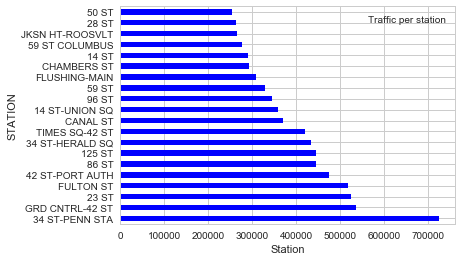

In [331]:
top20stations_wk.plot(kind='barh', x='STATION', y='nn99_entries',label='Traffic per station', color='blue')
plt.xlabel('Station')

In [332]:
x = top20stations_wk['STATION'].values
y = top20stations_wk['nn99_entries'].values
print(len(x), len(y))

20 20


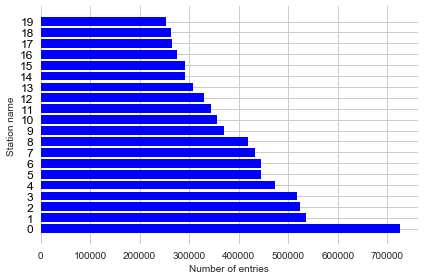

In [333]:
y_pos = np.arange(len(x))
fig = plt.figure(facecolor='white')
plt.box(on=None)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='on',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelleft='on') # labels along the bottom edge are off


plt.barh(y_pos, y,  align='center',
        color='blue', ecolor='black')
#plt.set_yticks(y_pos)
# ax.set_yticklabels(x)
# ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel('Number of entries')
# ax.set_ylabel('Station name')
# ax.set_title('Top 20 station by volume')
plt.xlabel("Number of entries", fontsize = 10)
plt.ylabel("Station name", fontsize = 10)
plt.tick_params(labelsize=10)
plt.yticks(y_pos,color='black',fontsize=12)
plt.savefig('MTN.eps',format='eps',dpi=1000)
fig.tight_layout()
plt.show()

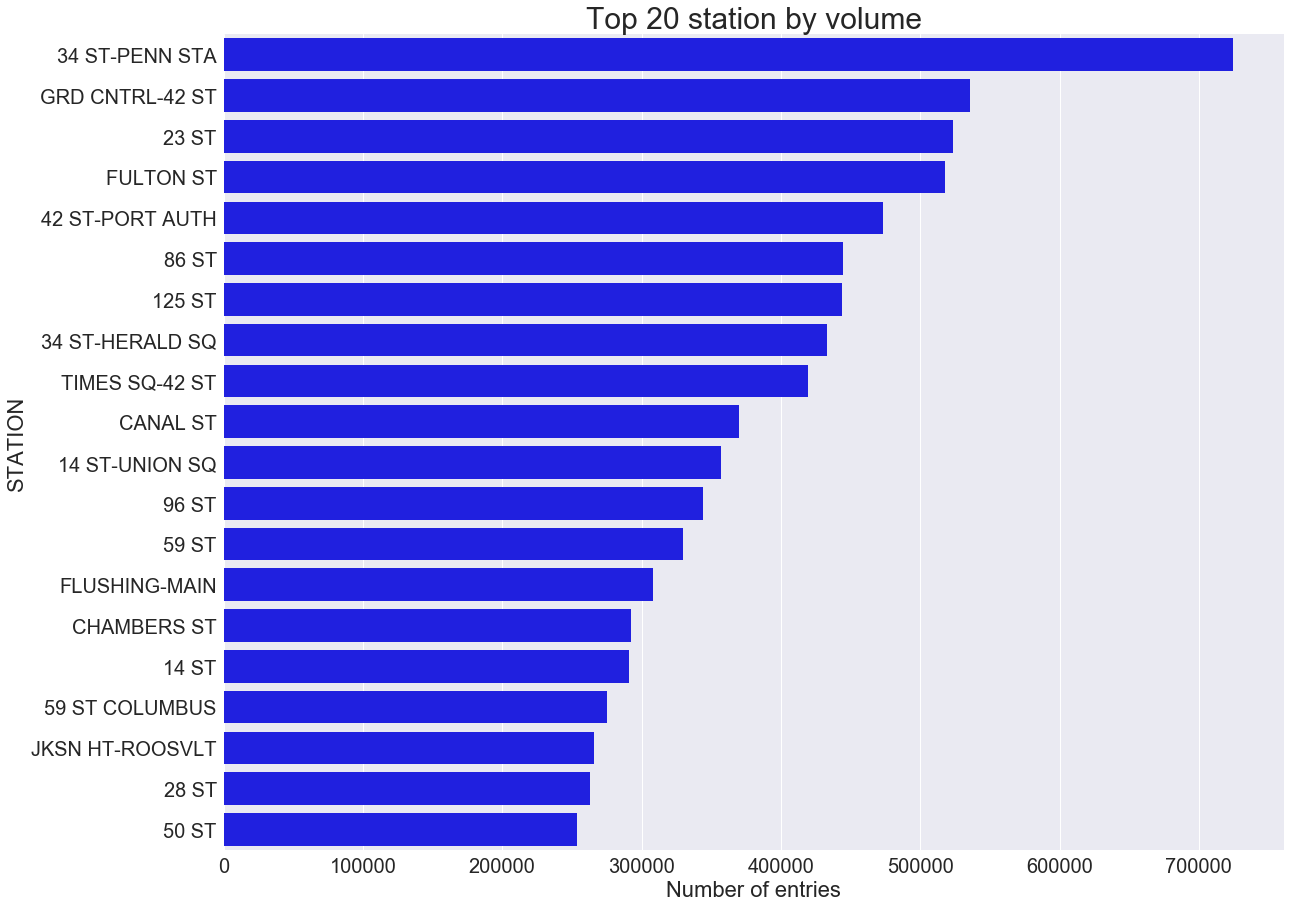

In [334]:
import matplotlib as mpl
mpl.rc('font', family='serif', serif='Times New Roman')
sns.reset_orig()
sns.set_style("white",
              {'xtick.major.size': 1.5,
               'ytick.major.size': 0.0,
               'xtick.direction': u'in',
               'axes.linewidth': 0.5,
               'axes.edgecolor': '.2',
               'grid.linestyle': u'-',
               'axes.labelcolor': '.05',
               'ytick.major.size': 0.0,
               'ytick.minor.size': 0.0,
               'ytick.direction': u'out',
               'axes.labelcolor': '.45',
               'text.color': '.05',
               'ytick.color': '.15',
               'grid.color': '.95'})
#sns.set_color_codes("pastel")
sns.set_context("talk")
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(19, 15))
sns.set(style="whitegrid")
np.random.seed(sum(map(ord, "aesthetics")))
ax=sns.barplot(y="STATION", x="nn99_entries", data=top20stations_wk, # data source defined here...
            label="Total",color='blue');
sns.despine(left=True, bottom=True)
ax.set_title('Top 20 station by volume',fontsize=30)
ax.set_xlabel('Number of entries')
#ax.set_xticks([])
plt.savefig('MTN'+'.'+'png',format='png')
plt.show()
#ax.set_yticks([])

In [335]:
df_final_date_graph['day_of_week'] = [calendar.day_name[i.weekday()] for i in df_final_date_graph.date]

In [336]:
df_final.head()

,turnstile_id,STATION,date,ENTRIES,EXITS,DATE_TIME,nn_entries,nn_exits
1,A002_R051_02-00-00_59 ST,59 ST,2018-03-24,0.0,0.0,04:00:00,0.0,0.0
2,A002_R051_02-00-00_59 ST,59 ST,2018-03-24,0.0,0.0,04:00:00,0.0,0.0
3,A002_R051_02-00-00_59 ST,59 ST,2018-03-24,1.0,1.0,04:00:00,1.0,1.0
4,A002_R051_02-00-00_59 ST,59 ST,2018-03-24,4.0,4.0,04:00:00,4.0,4.0
5,A002_R051_02-00-00_59 ST,59 ST,2018-03-24,14.0,3.0,04:00:00,14.0,3.0


In [337]:
df_final_date_graph =df_final_date_graph.groupby(by=['STATION','day_of_week']).sum()[['nn99_entries']].sort_values('nn99_entries', ascending=False)

In [338]:
df_final_date_graph.reset_index(inplace=True)

In [339]:
df_final_date_graph.head()

,STATION,day_of_week,nn99_entries
0,34 ST-PENN STA,Tuesday,122185.0
1,34 ST-PENN STA,Thursday,121954.0
2,34 ST-PENN STA,Wednesday,120873.0
3,34 ST-PENN STA,Monday,116592.0
4,34 ST-PENN STA,Friday,108447.0


In [340]:
def plot_hbar(dF,s):
    from pylab import rcParams
    rcParams['legend.handlelength'] = 0.01
    sns.set_style("white",
              {'xtick.major.size': 1.5,
               'ytick.major.size': 0.0,
               'xtick.direction': u'in',
               'axes.linewidth': 0.5,
               'axes.edgecolor': '.2',
               'grid.linestyle': u'-',
               'axes.labelcolor': '.05',
               'ytick.major.size': 0.0,
               'ytick.minor.size': 1.0,
               'ytick.direction': u'out',
               'axes.labelcolor': '.45',
               'text.color': '.05',
               'ytick.color': '.15',
               'grid.color': '.95'})
    sns.set_color_codes("pastel")
    sns.set_context("talk")

    f, ax = plt.subplots(figsize=(17, 15))
    sns.set(style="whitegrid")
    np.random.seed(sum(map(ord, "aesthetics")))
    ax=sns.barplot(x='nn99_entries', y='day_of_week', data=dF,
            label=s, color='blue');
    sns.despine(left=True, bottom=True)
    ax.set_title('Station by volume')
    ax.set_ylabel('Day of Week')
    ax.set_xlabel('Number of entries')
    #ax.set_xticks([])
    ax.legend(loc='lower right')
    plt.savefig(s+'.'+'png',format='png')
    plt.show()

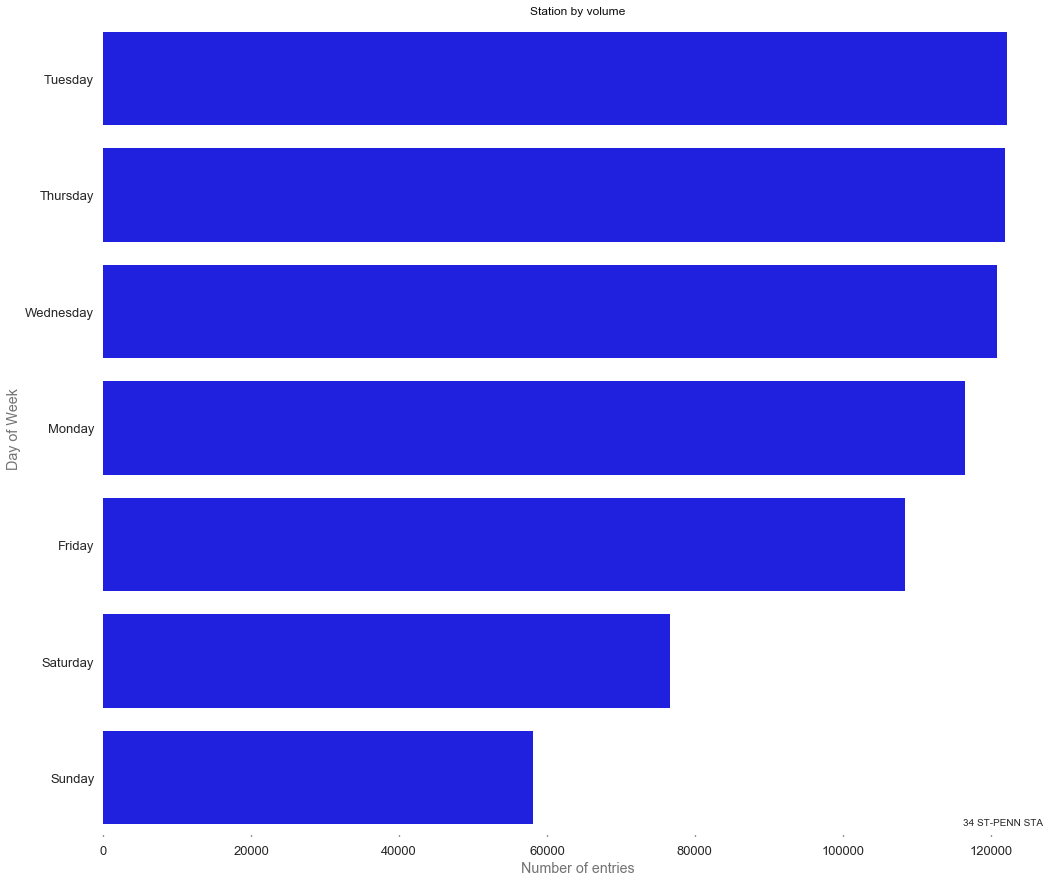

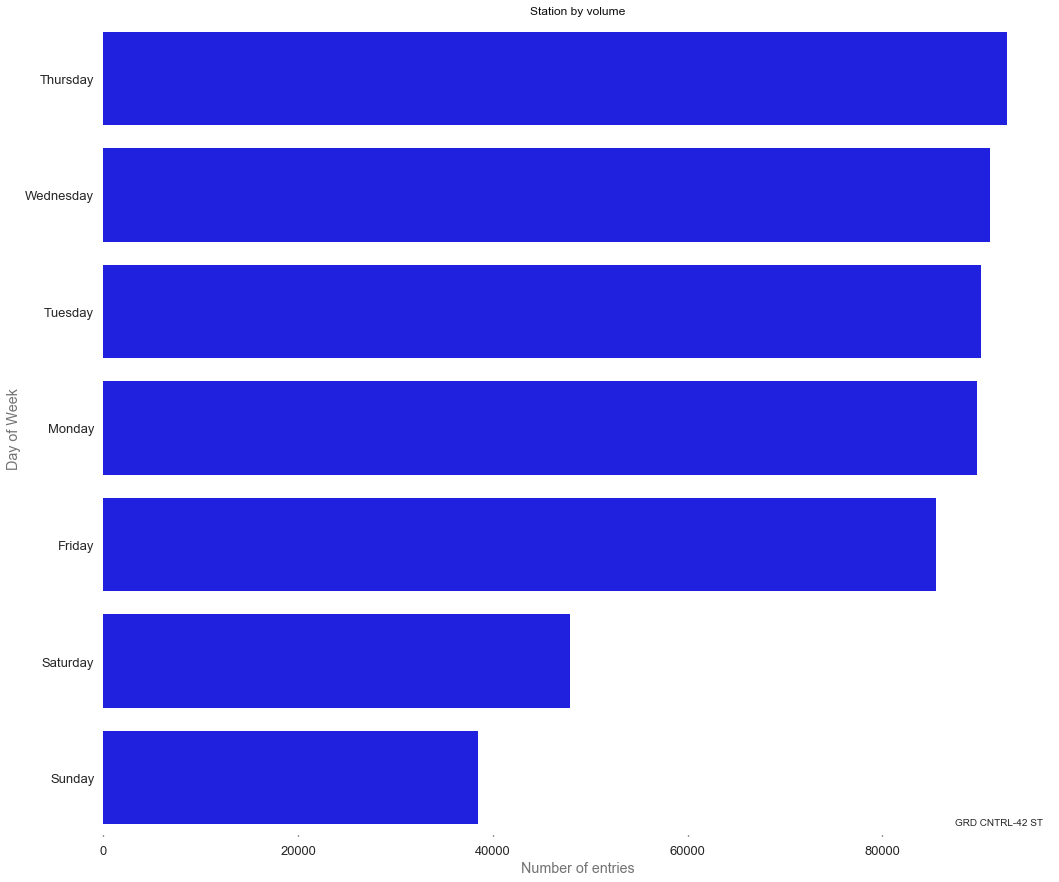

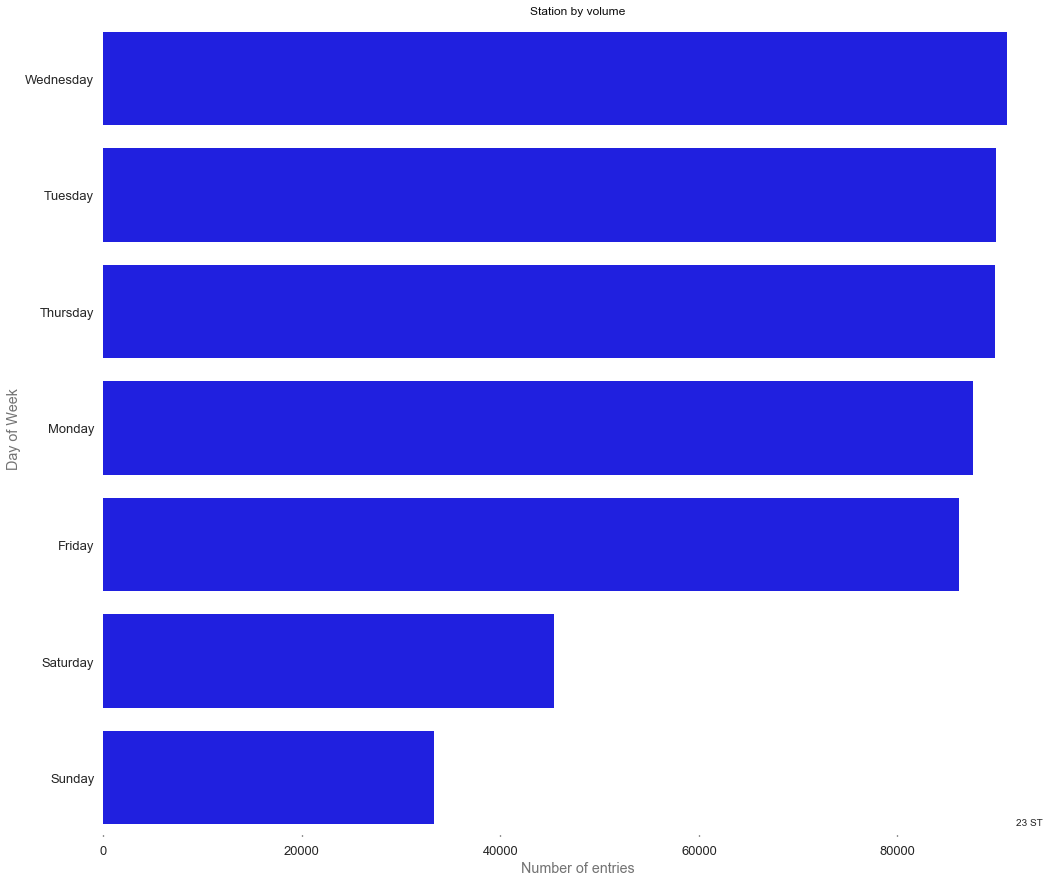

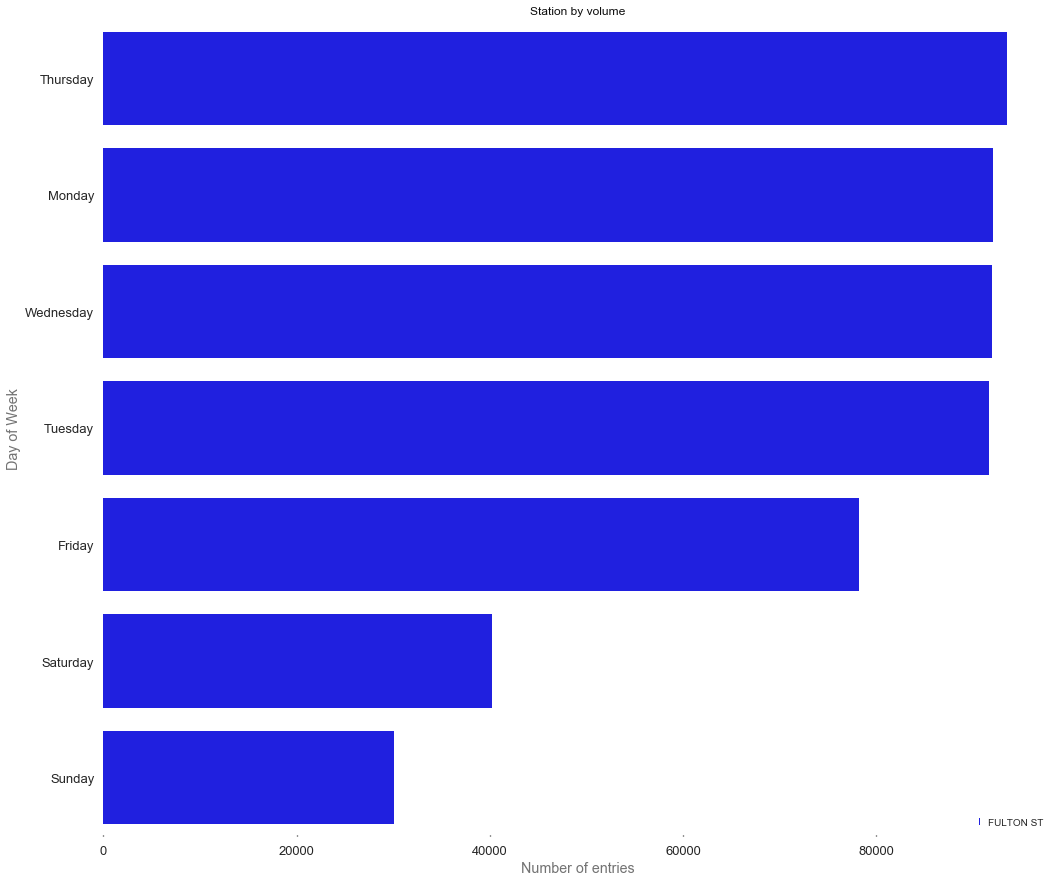

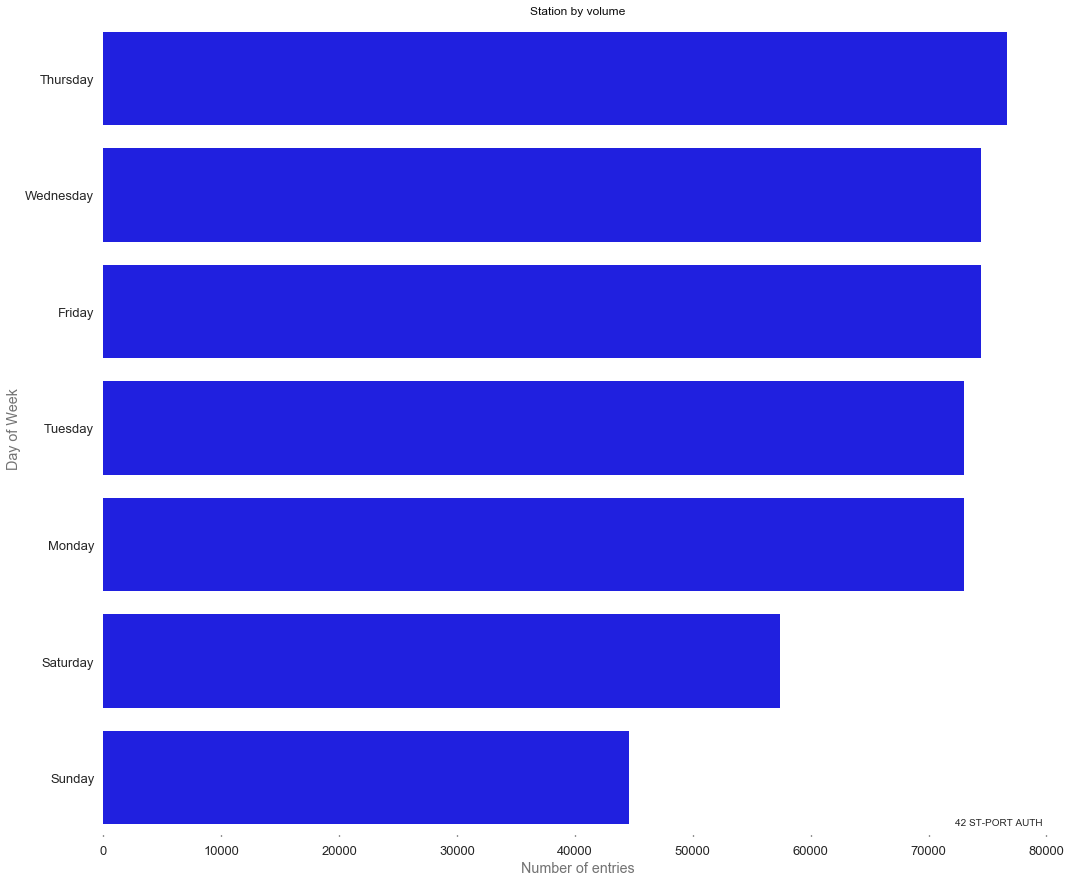

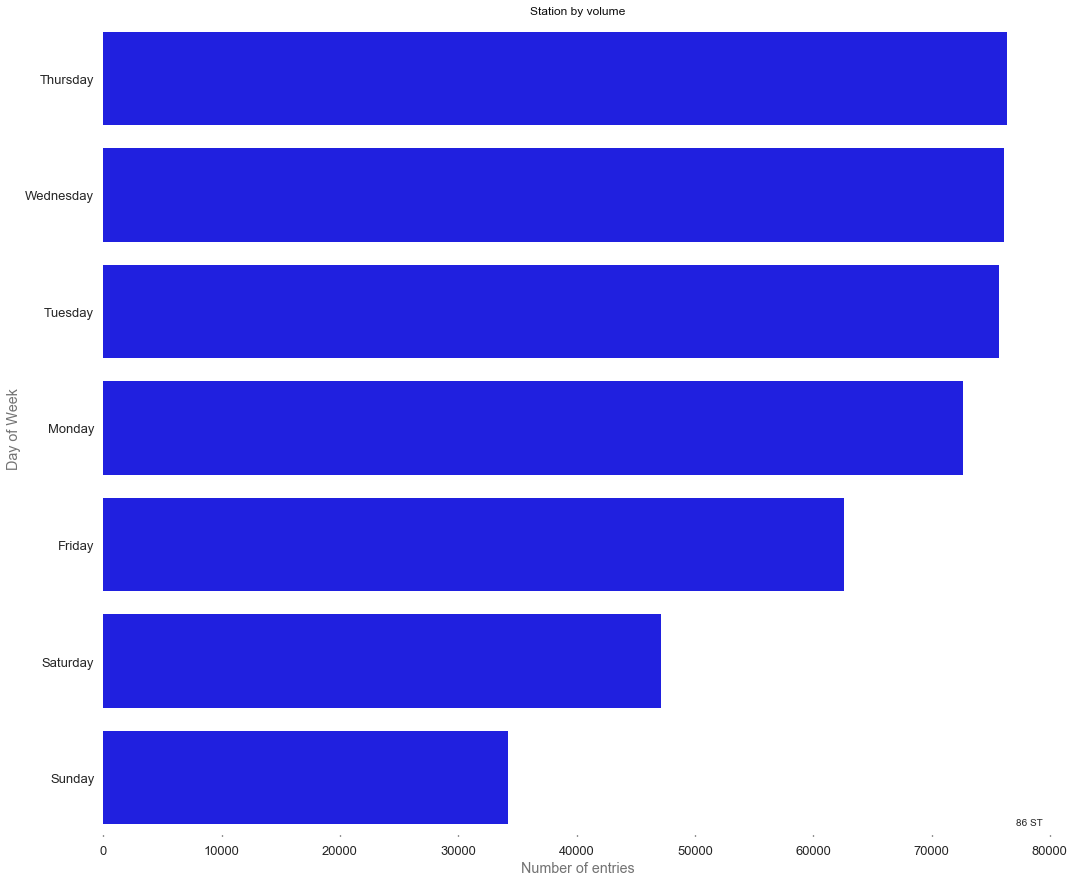

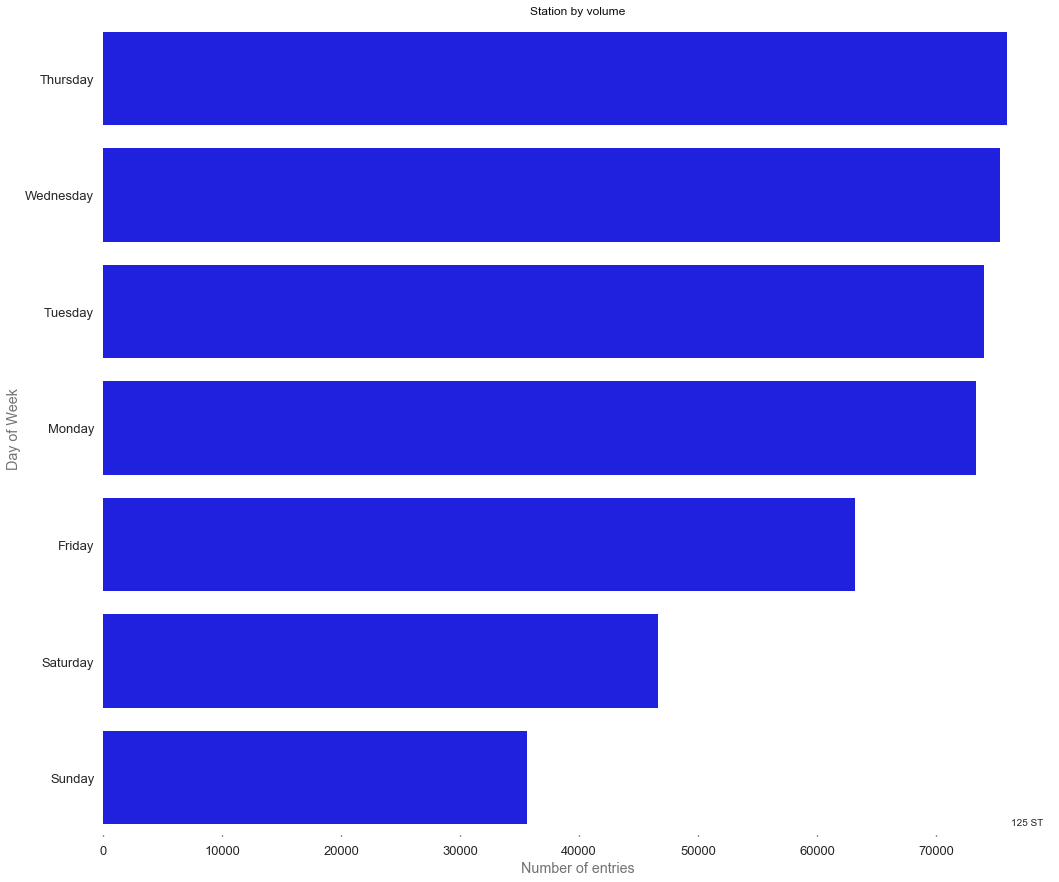

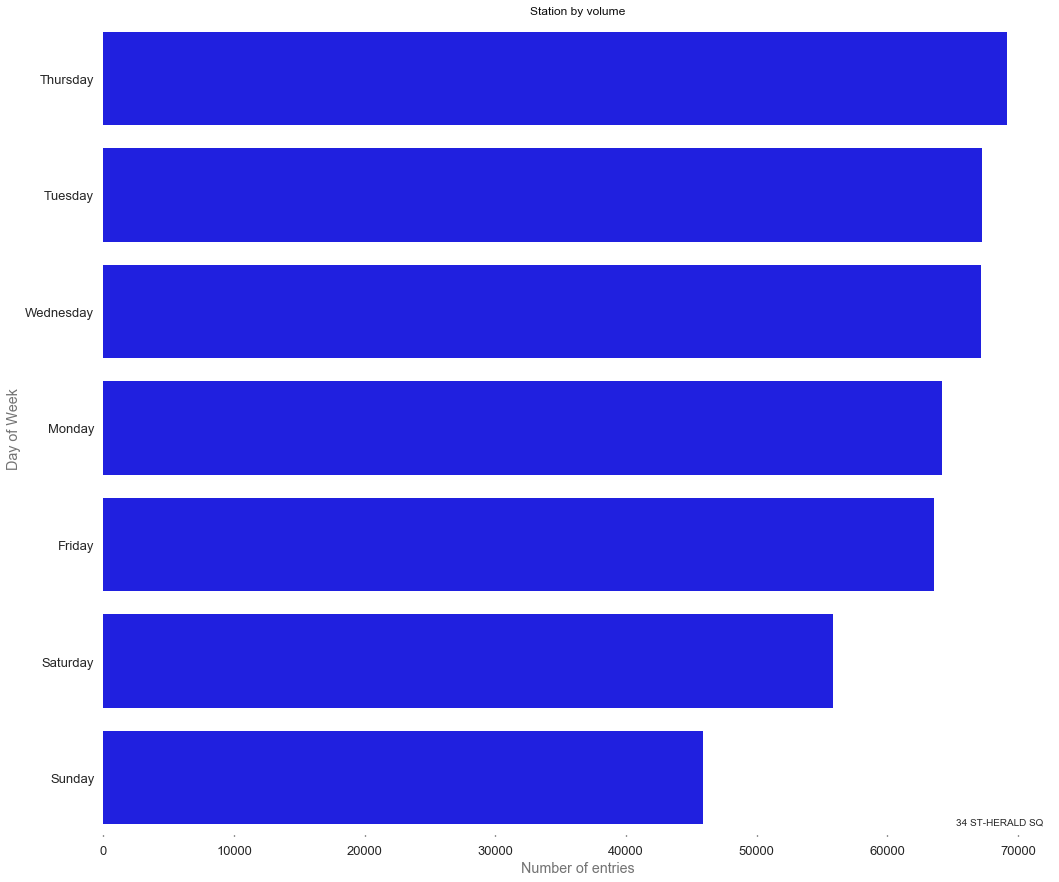

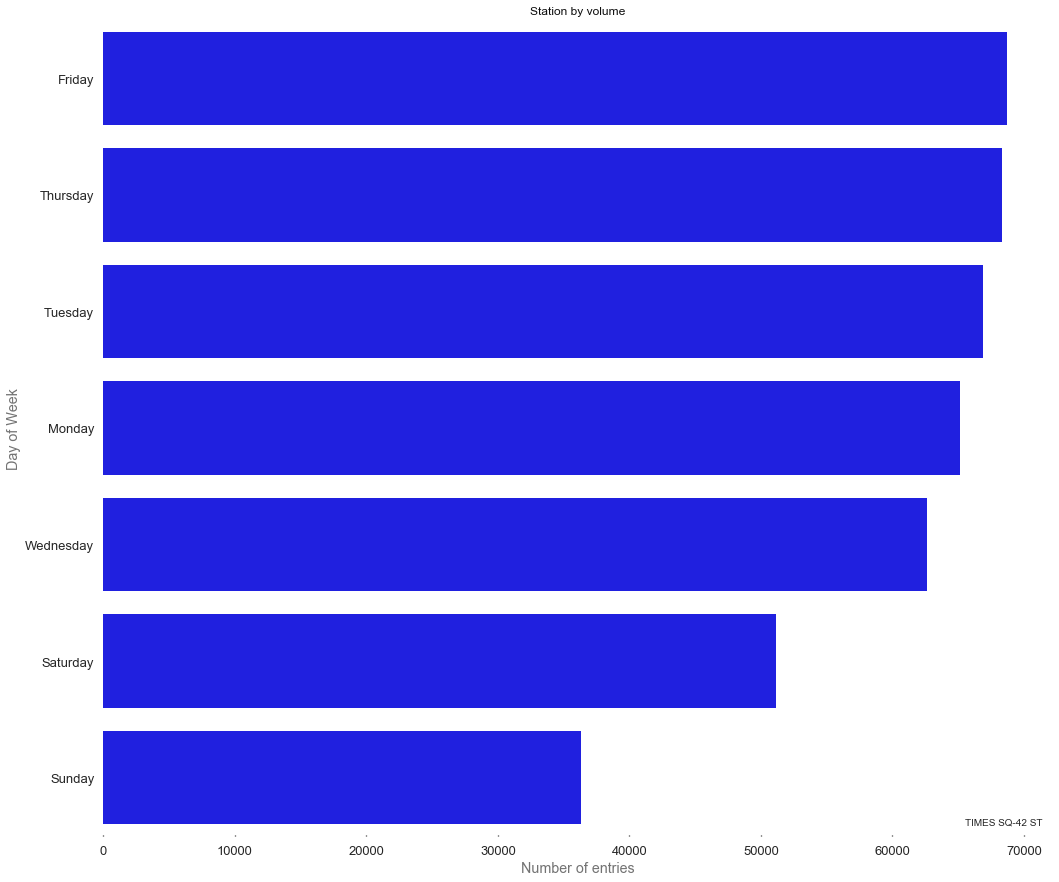

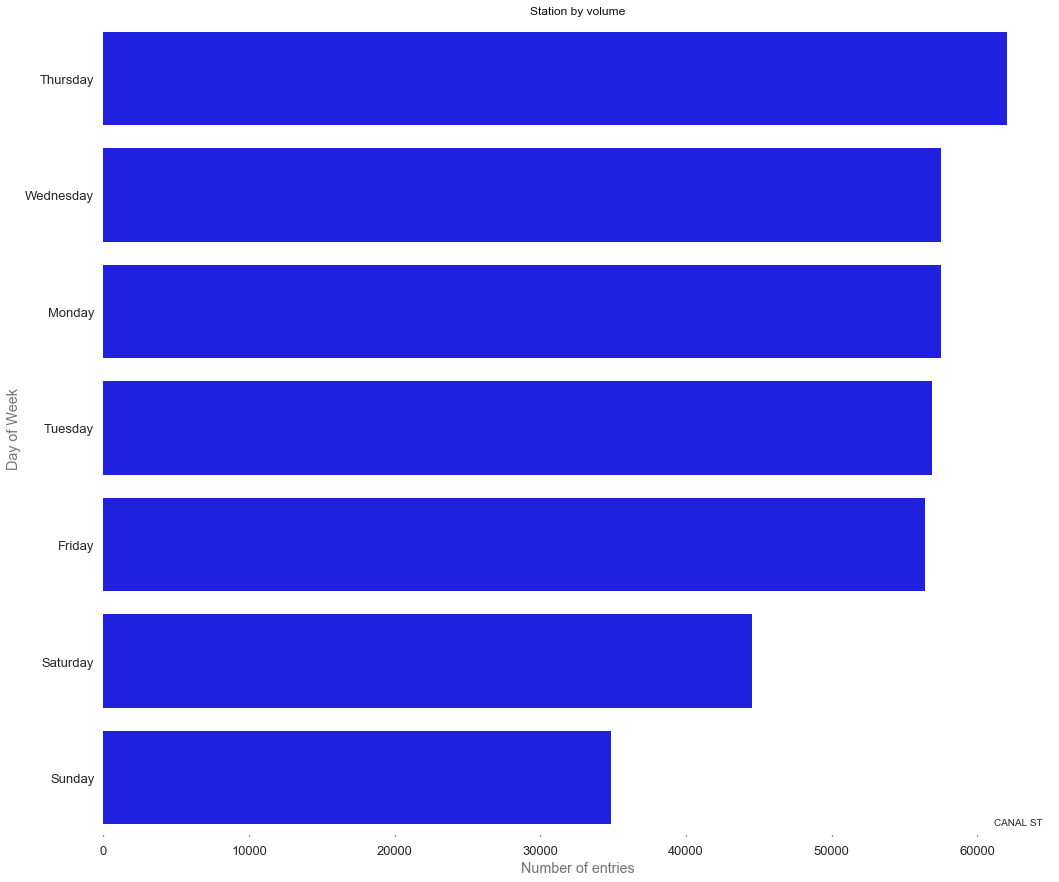

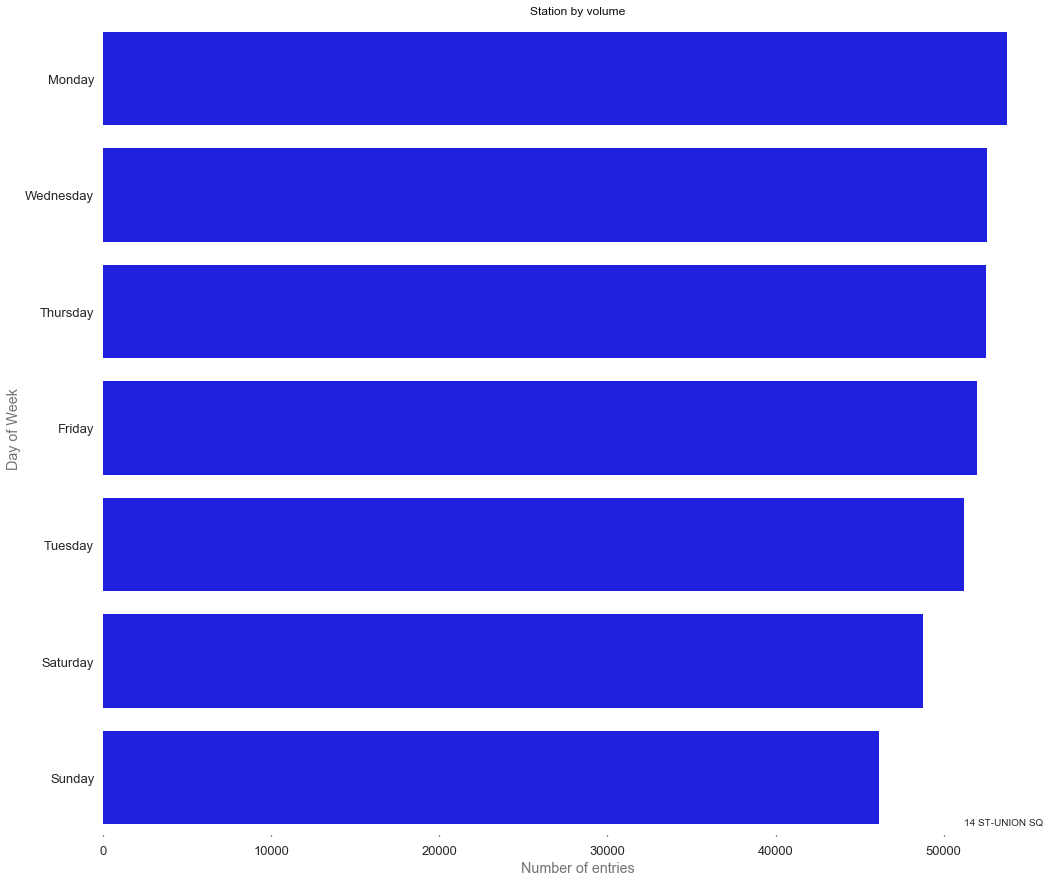

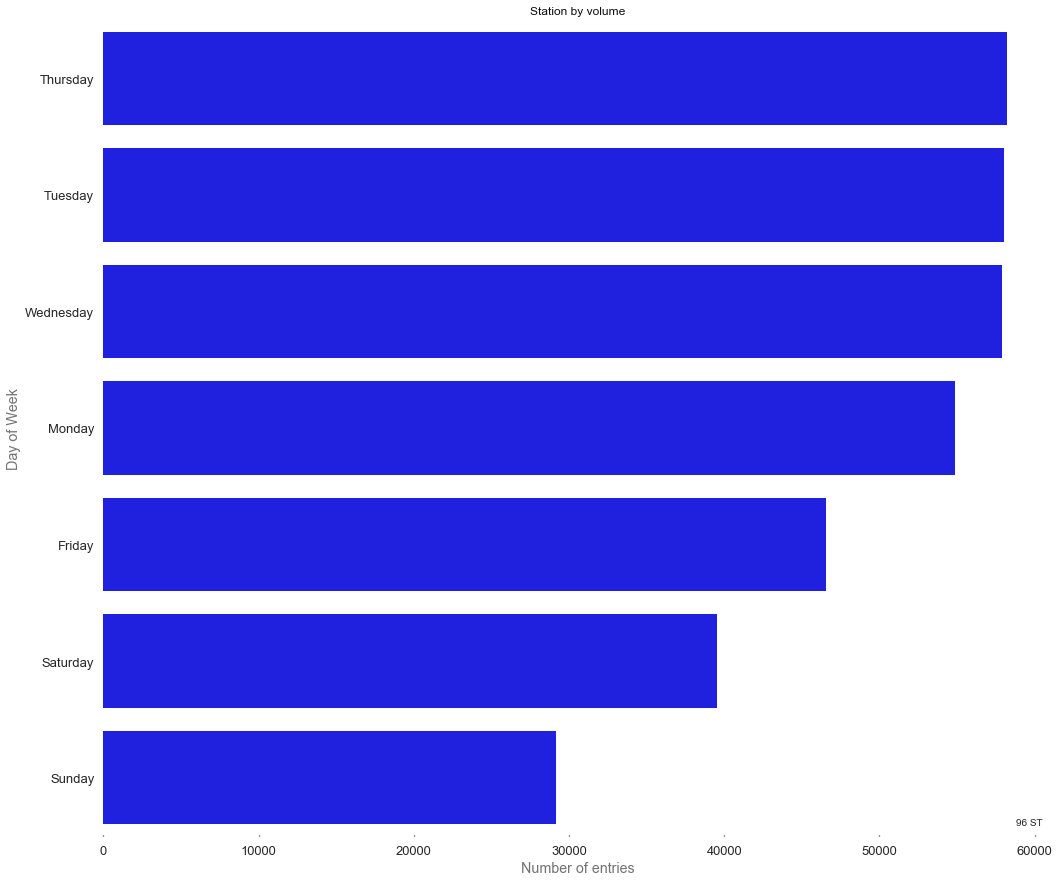

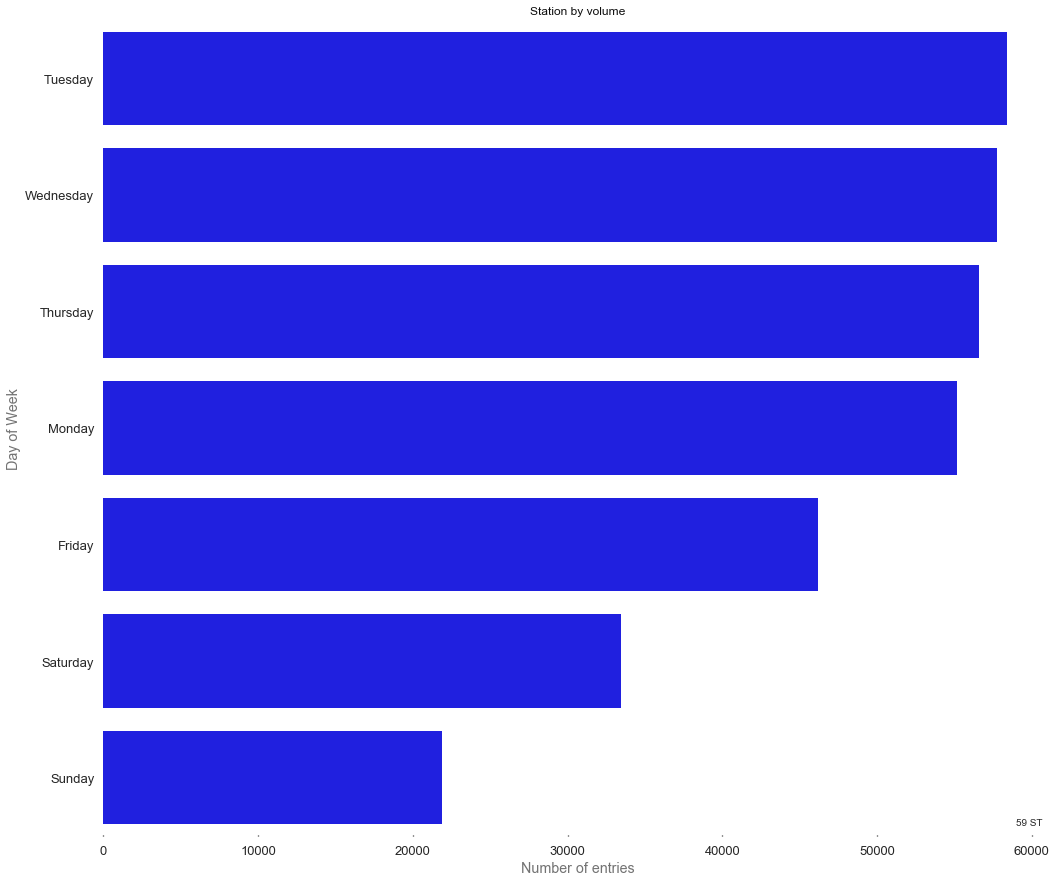

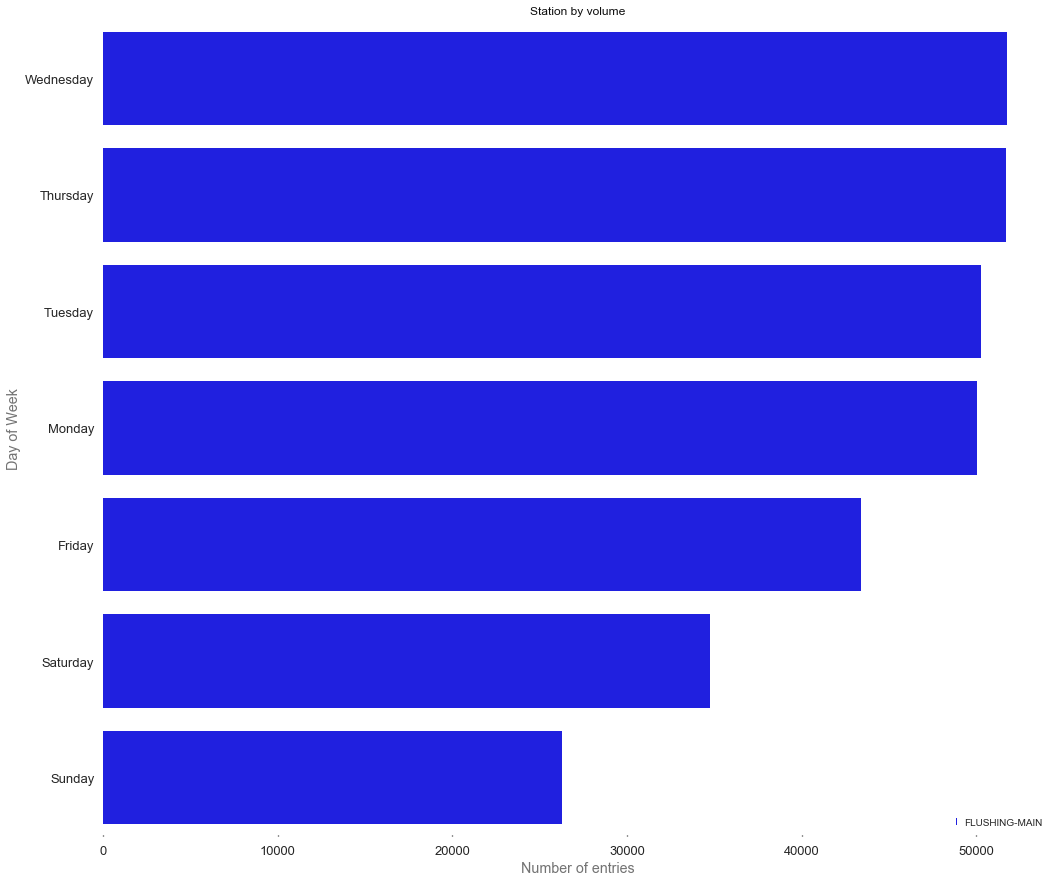

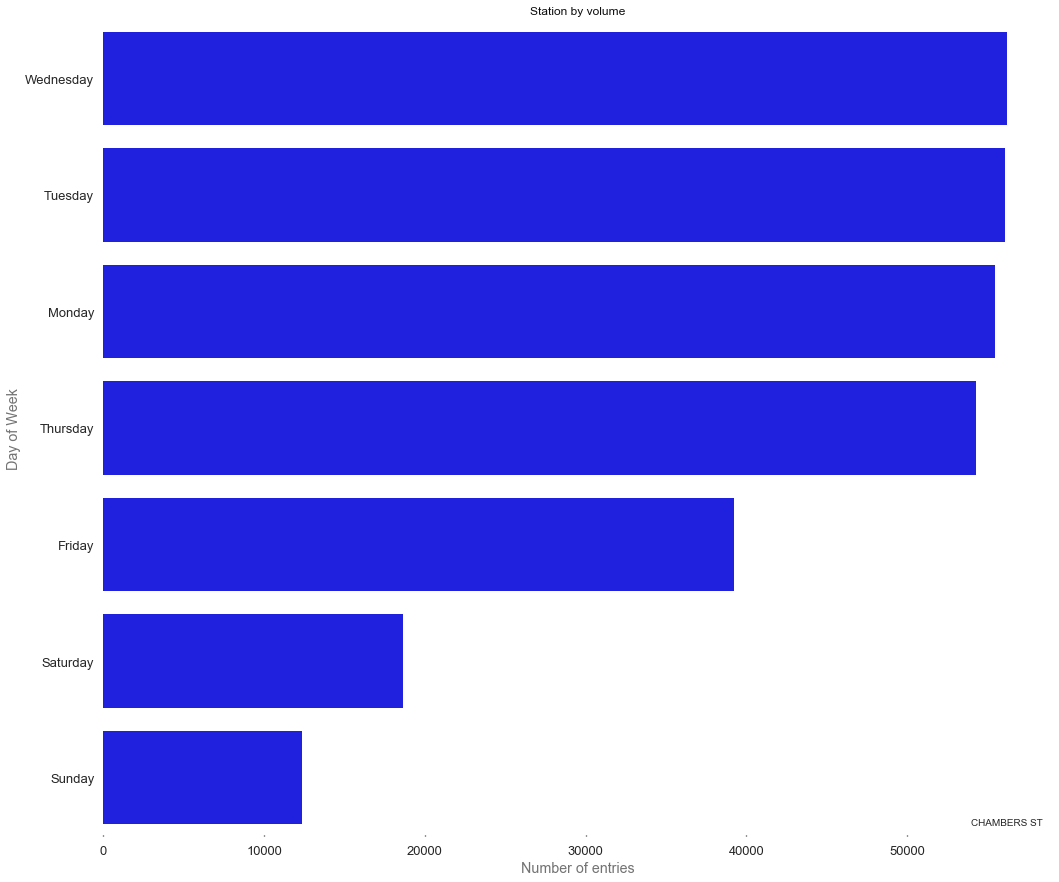

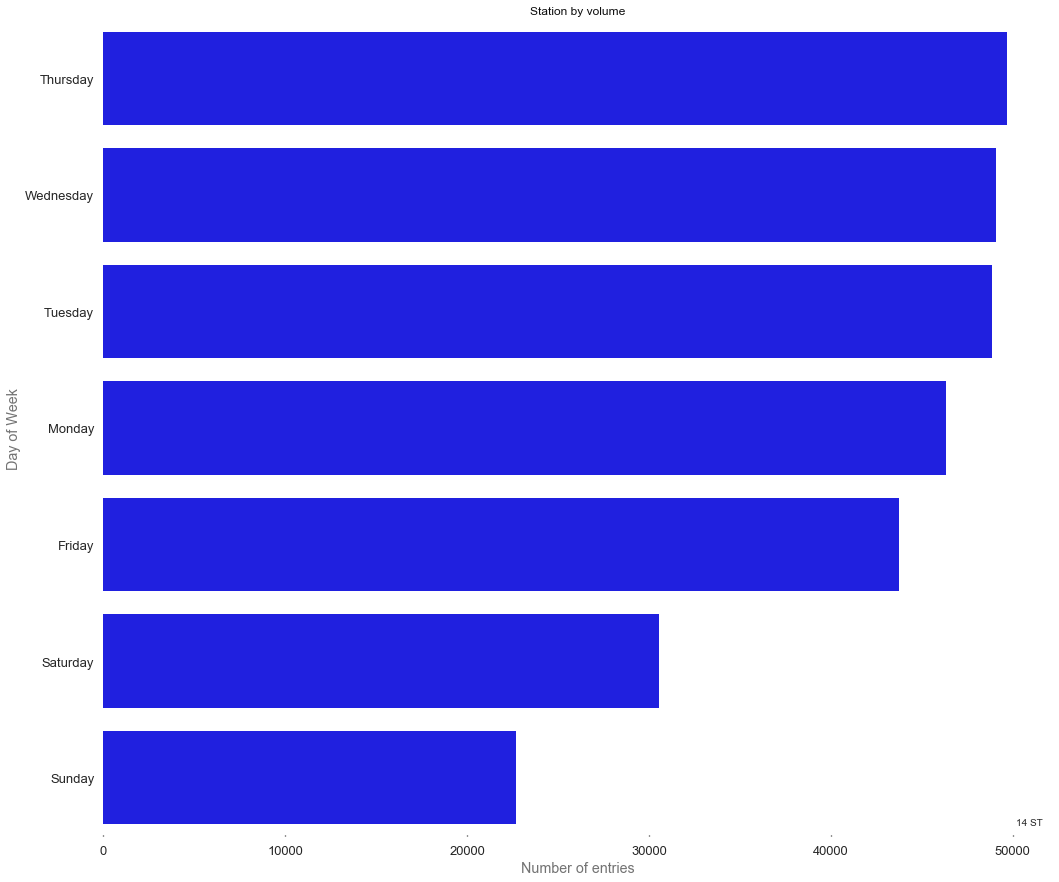

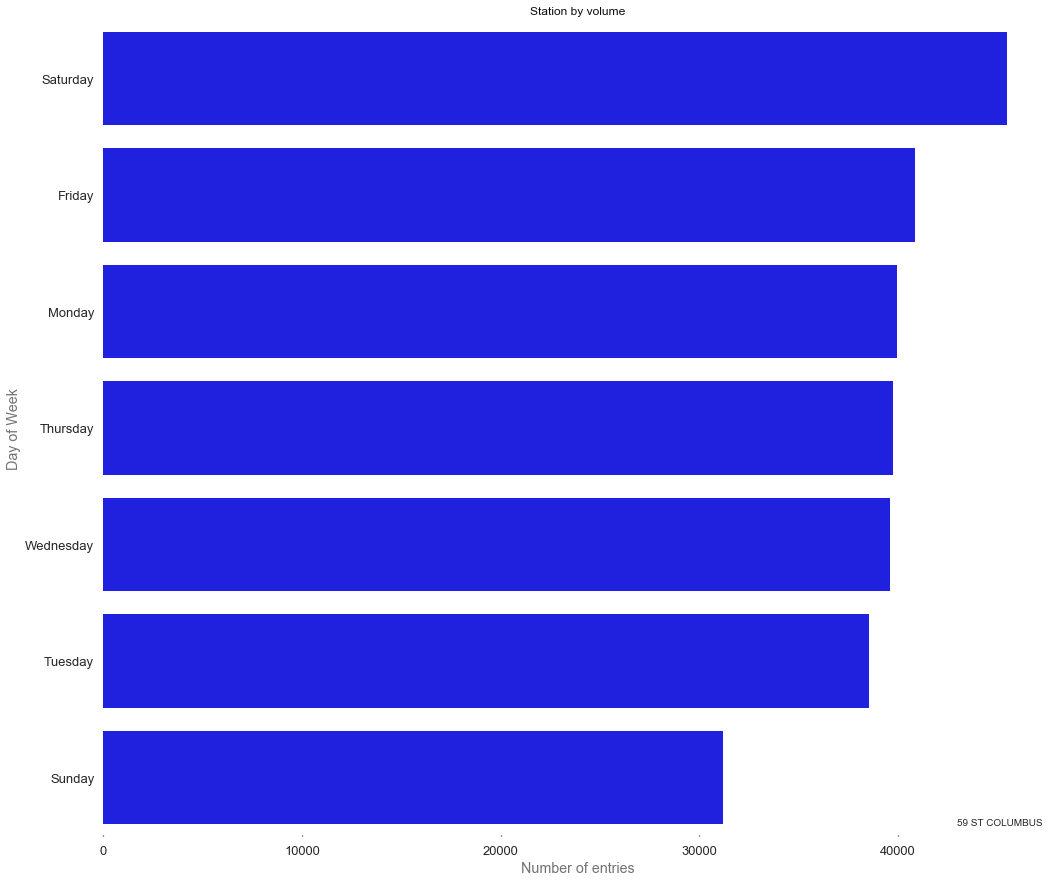

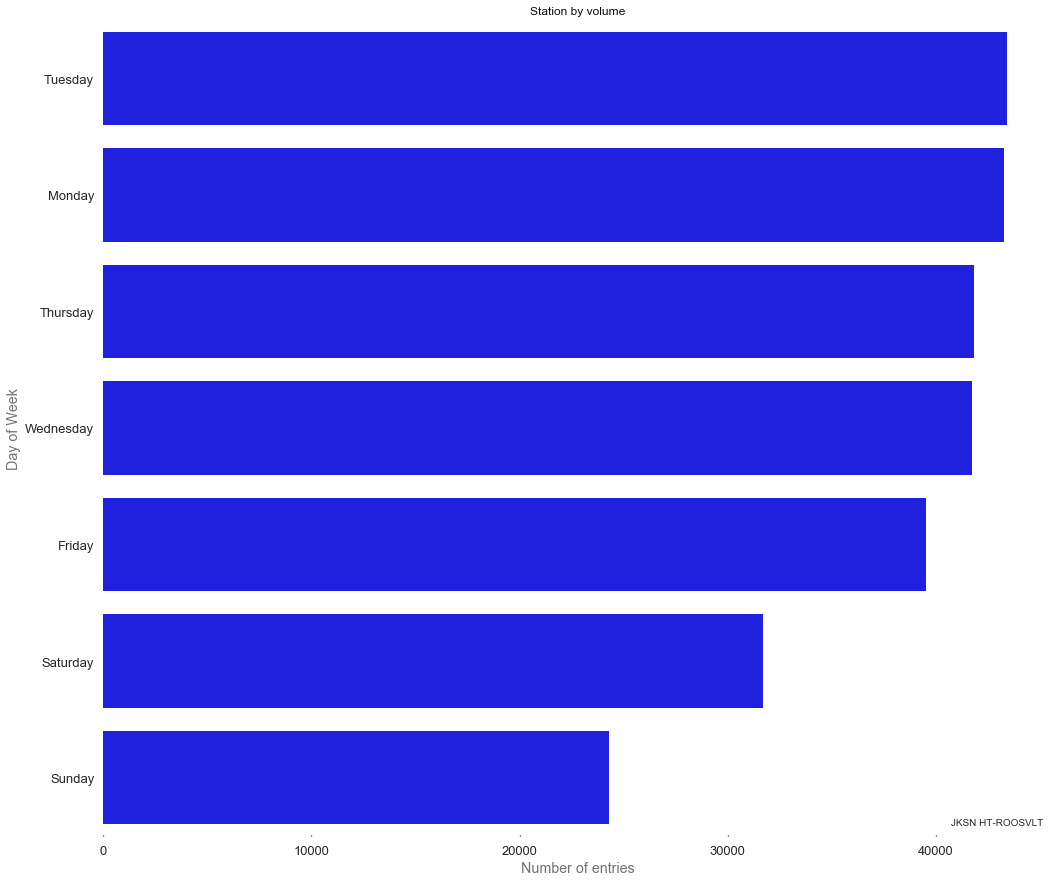

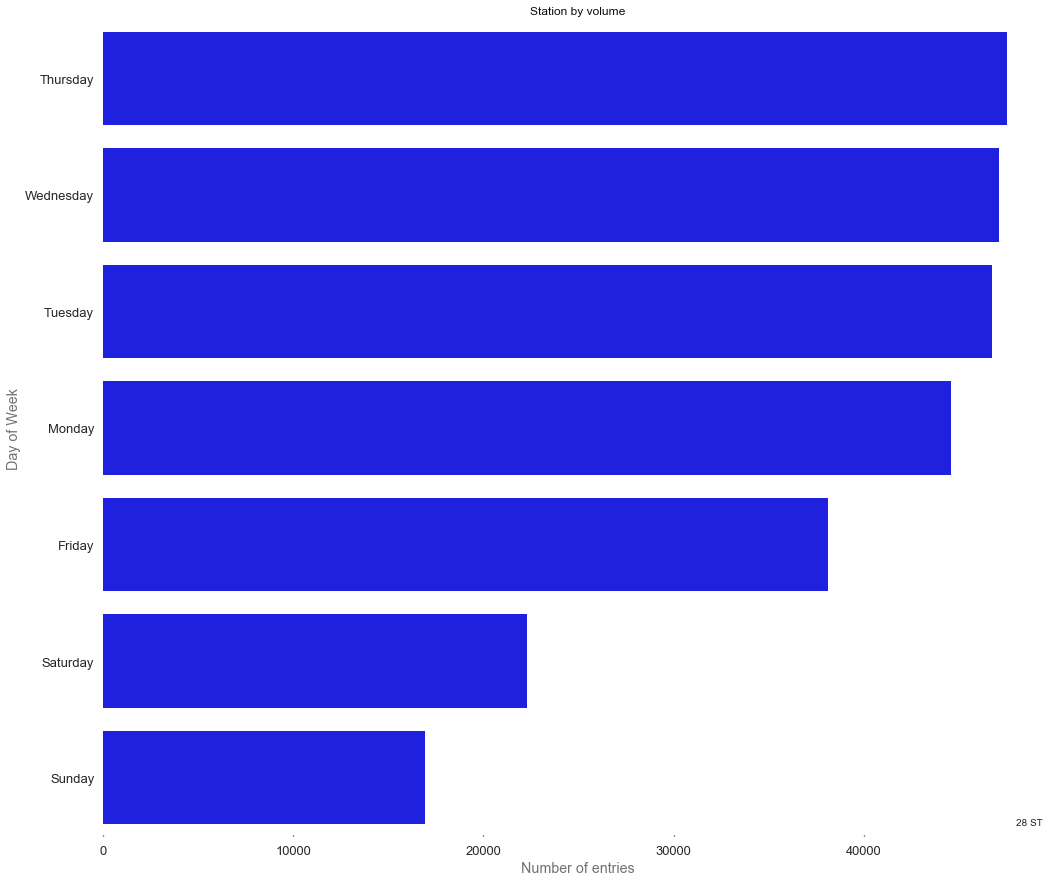

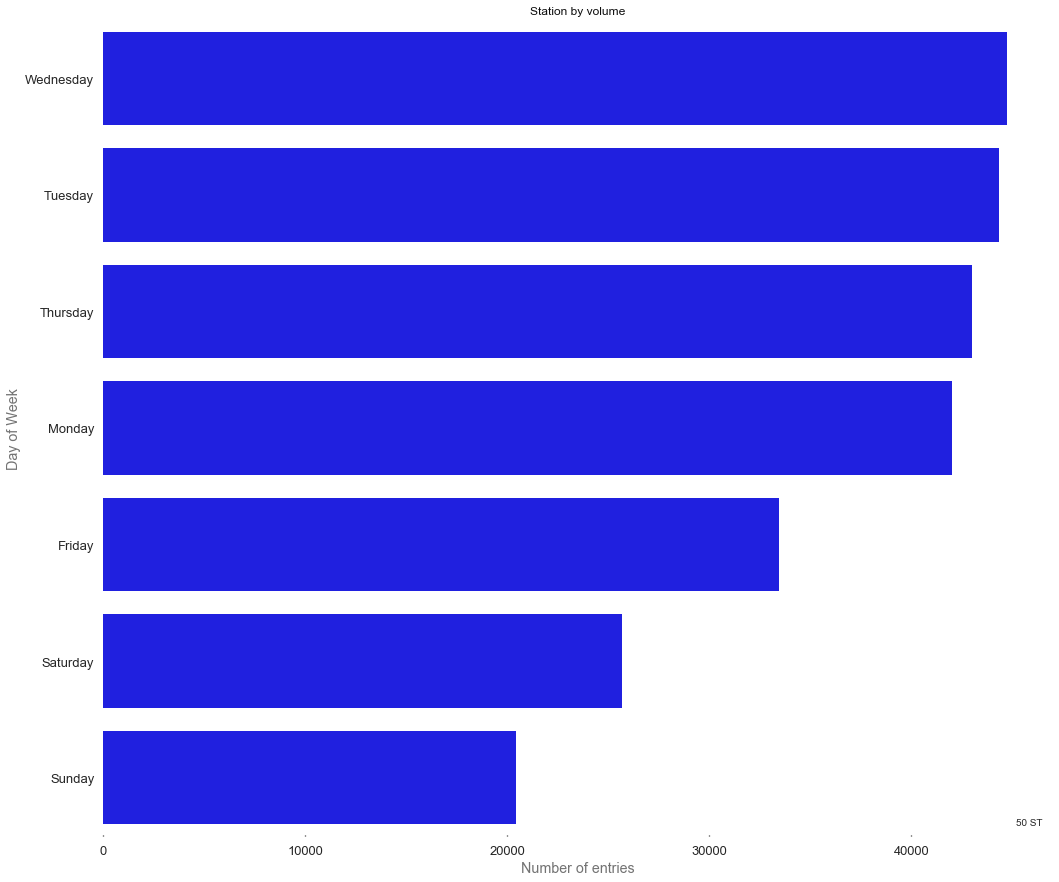

In [341]:
for s in top20stations_list:
    df_new = pd.DataFrame()
    df_new = df_final_date_graph[df_final_date_graph['STATION']==s]
    plot_hbar(df_new,s)


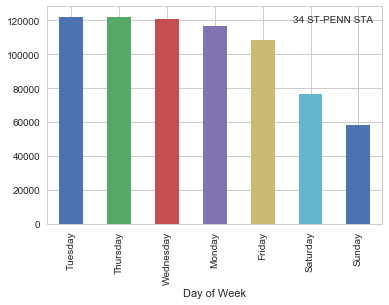

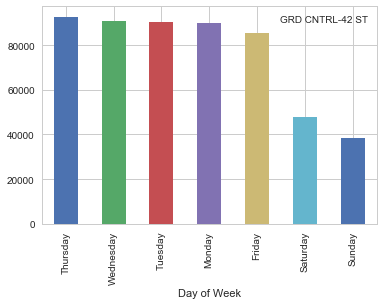

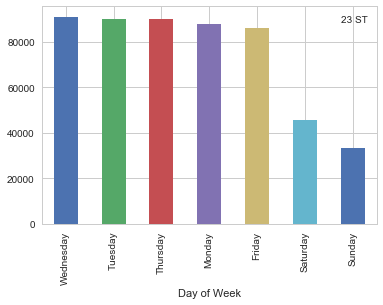

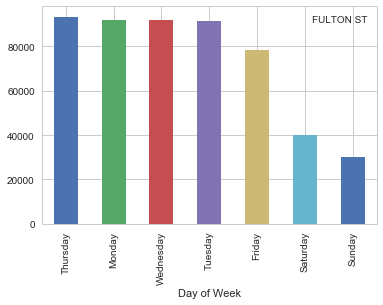

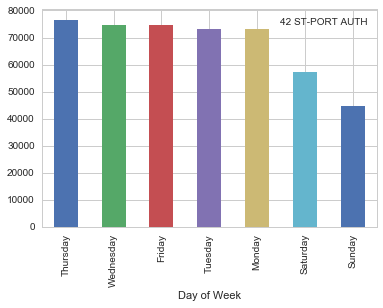

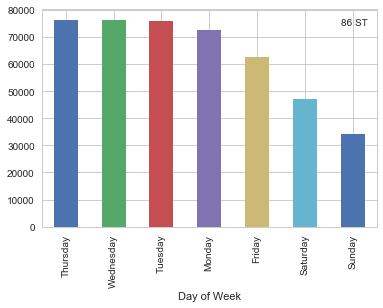

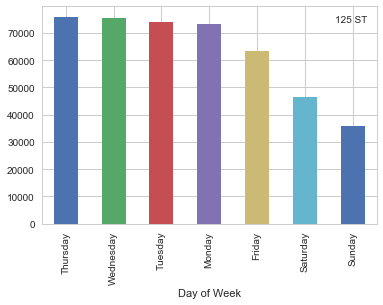

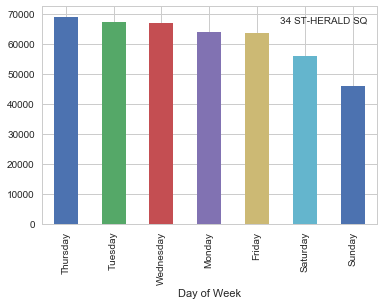

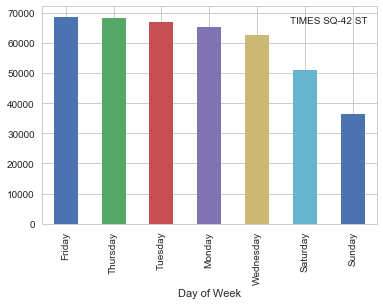

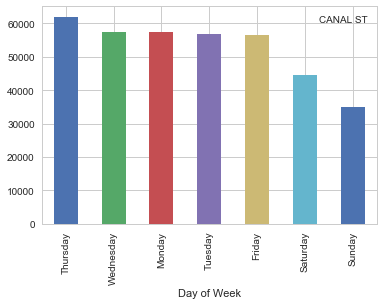

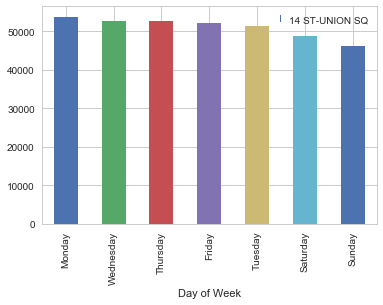

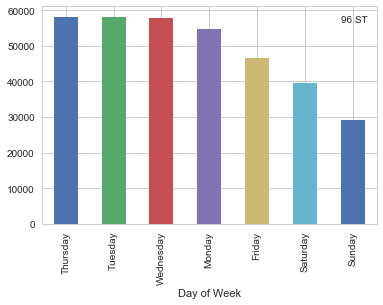

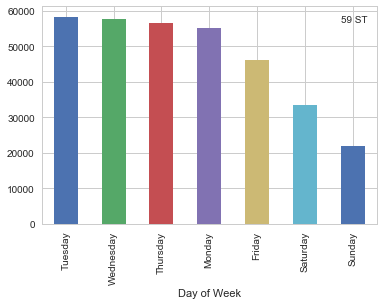

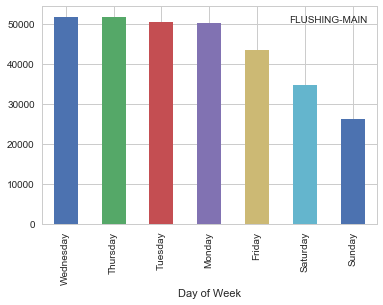

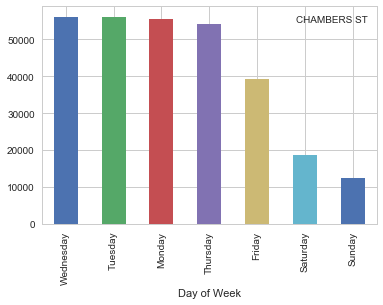

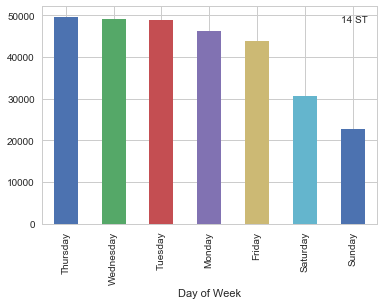

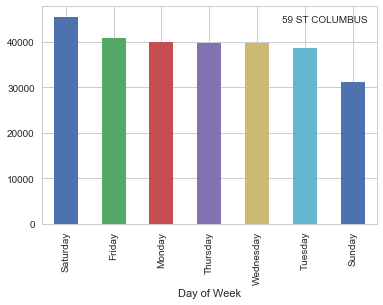

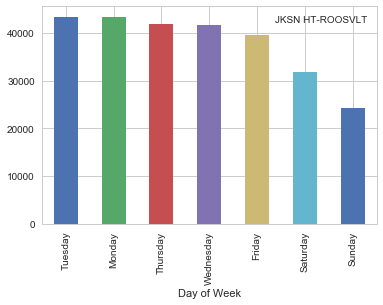

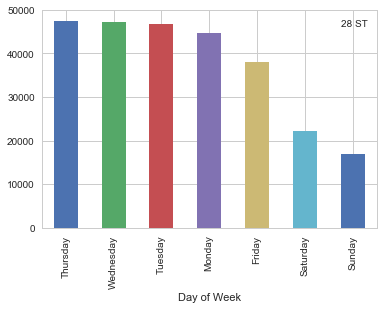

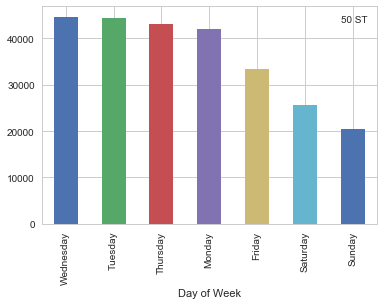

In [342]:
#df_list_kelly = []
for s in top20stations_list:
    #print(s)
    df_new=pd.DataFrame()
    df_new=df_final_date_graph[df_final_date_graph['STATION']==s]
    #df_list_kelly.append(df_new)
    df_new.plot(kind='bar', x='day_of_week', y='nn99_entries',label=s)
    plt.xlabel('Day of Week')
#df_kelly = pd.concat(df_list_kelly)    

## 